### Задание
Требуется построить модель рекомендаций на основе скрытых факторов (implicit) на основе dataset’а https://grouplens.org/datasets/hetrec-2011/ (Delicious Bookmarks)”

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import scipy.sparse as sparse
%matplotlib inline
from implicit.als import AlternatingLeastSquares

In [47]:
data = pd.read_csv('data/hetrec2011/user_taggedbookmarks-timestamps.dat', sep='\t')
data = data[['userID', 'bookmarkID', 'tagID']]
data.columns = ['user_id', 'bookmark_id', 'tag_id']

In [48]:
data = data.groupby(['user_id', 'bookmark_id']).count().sort_values(by='tag_id', ascending=False).reset_index()
#data['tagID'] =  data.tagID.apply(lambda x: 1  if x >= 1 else 0)
data.head()

,user_id,bookmark_id,tag_id
0,63050,88201,70
1,92177,13631,66
2,63050,88179,63
3,87302,8538,60
4,63050,88186,60


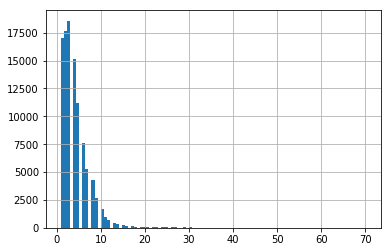

In [49]:
data.tag_id.hist(bins=100)

In [51]:
len(data.user_id.unique())

1867

In [52]:
len(data.bookmark_id.unique())

69223

In [55]:
users = list(np.sort(data.user_id.unique()))
bookmarks = list(np.sort(data.bookmark_id.unique()))
tags = list(data.tag_id)

In [61]:
rows = data.user_id.astype(int)
cols = data.bookmark_id.astype(int)

In [63]:
len(rows), len(cols)

(104799, 104799)

In [64]:
(len(bookmarks), len(users))

(69223, 1867)

In [60]:
data_sparse = sparse.csr_matrix((tags, (cols, rows)), shape=(len(bookmarks), len(users)))

ValueError: row index exceeds matrix dimensions